In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import random

In [2]:
np.random.seed(seed=0)

In [3]:
from simulation.cloud import Cloud

In [4]:
cloud = Cloud(num_leafs=576,
              num_hosts_per_leaf=48,
              num_rules_perf_leaf=200,
              max_vms_per_host=20,
              num_tenants=3000,
              min_vms_per_tenant=10,
              max_vms_per_tenant=5000,
              vm_dist='expon',
              num_groups=100000,
              min_group_size=5,
              group_size_dist='uniform',
              placement_dist='colocate-random',
              colocate_num_hosts_per_leaf=48,
              num_bitmaps=10)

network[leaf_to_hosts]: initialized.
network[host_to_leaf]: initialized.
tenants[vm_count]: initialized.
tenants[group_count]: initialized.
tenants[groups_to_sizes]: initialized.
tenants[groups_to_vms]: initialized.
placement[tenant_vms_to_host]: initialized.
placement[tenant_vms_to_leaf]: initialized.
placement[tenant_groups_to_leafs_and_count]: initialized.
placement[tenant_groups_leafs_to_hosts_and_bitmap]: initialized.
optimization: complete.


In [5]:
from simulation.plot import *

In [6]:
plot = Plot(plt, Data(cloud))

data: complete.


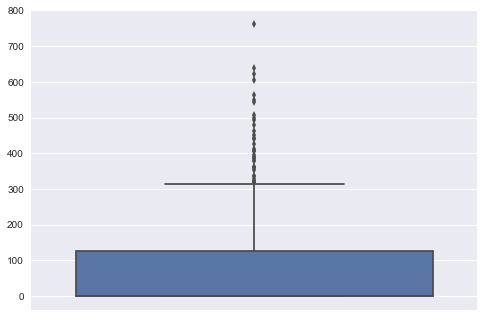

In [7]:
sb.boxplot(y=plot.data.rules_for_all_leafs)

In [8]:
plot.data.rules_for_all_leafs.describe()

count    576.000000
mean      76.852431
std      131.767308
min        0.000000
25%        0.000000
50%        0.000000
75%      127.500000
max      761.000000
dtype: float64

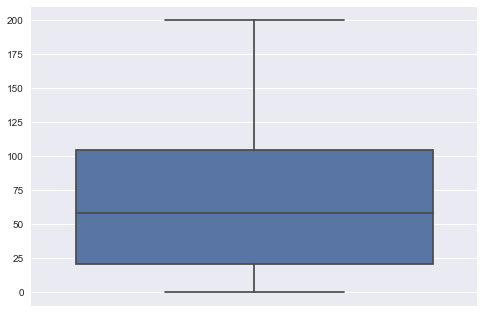

In [9]:
sb.boxplot(y=plot.data.rules_for_all_leafs_post_optimization)

In [10]:
plot.data.rules_for_all_leafs_post_optimization.describe()

count    576.000000
mean      70.637153
std       61.174862
min        0.000000
25%       21.000000
50%       58.500000
75%      105.000000
max      200.000000
dtype: float64

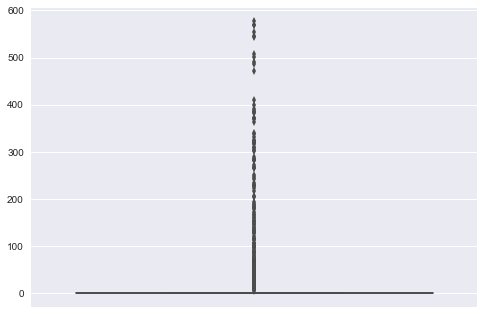

In [11]:
sb.boxplot(y=plot.data.redundancy_for_all_groups_in_all_tenants)

In [12]:
plot.data.redundancy_for_all_groups_in_all_tenants.describe()

count    10932.000000
mean         2.695882
std         27.633684
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        576.785714
dtype: float64